<a href="https://colab.research.google.com/github/saadspark/Machine-Learning/blob/main/Deep_Learning_CNNs_Human_Emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fer2013' dataset.
Path to dataset files: /kaggle/input/fer2013


In [ ]:
files = os.listdir("/kaggle/input/fer2013")
print("Files in the dataset path:", files)

Files in the dataset path: ['test', 'train']


In [ ]:
train_path = os.path.join("/kaggle/input/fer2013", "train")
train_files = os.listdir(train_path)
print("Files in the 'train' directory:", train_files)

Files in the 'train' directory: ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [ ]:
surprise_path = os.path.join(train_path, "surprise")
surprise_files = os.listdir(surprise_path)
print("Files in the 'surprise' directory:", surprise_files)
fear_path = os.path.join(train_path, "fear")
fear_files = os.listdir(fear_path)
print("Files in the 'fear' directory:", fear_files)

Files in the 'surprise' directory: ['Training_66056468.jpg', 'Training_26522394.jpg', 'Training_63239185.jpg', 'Training_67725241.jpg', 'Training_71308969.jpg', 'Training_49242724.jpg', 'Training_69351834.jpg', 'Training_67440750.jpg', 'Training_93942694.jpg', 'Training_11693705.jpg', 'Training_52655852.jpg', 'Training_62829838.jpg', 'Training_46386777.jpg', 'Training_7022565.jpg', 'Training_97275390.jpg', 'Training_37026288.jpg', 'Training_44186778.jpg', 'Training_97667504.jpg', 'Training_43664635.jpg', 'Training_29912845.jpg', 'Training_75067608.jpg', 'Training_87248788.jpg', 'Training_11550894.jpg', 'Training_91279496.jpg', 'Training_85021238.jpg', 'Training_10366009.jpg', 'Training_45096582.jpg', 'Training_16801148.jpg', 'Training_49269050.jpg', 'Training_68990617.jpg', 'Training_75702986.jpg', 'Training_32069005.jpg', 'Training_43146925.jpg', 'Training_29618593.jpg', 'Training_36386200.jpg', 'Training_48335609.jpg', 'Training_74692648.jpg', 'Training_52280125.jpg', 'Training_53072

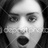

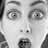

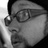

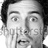

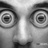

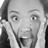

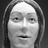

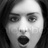

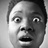

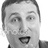

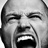

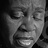

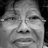

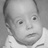

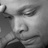

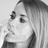

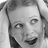

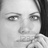

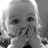

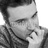

In [ ]:
from google.colab.patches import cv2_imshow

for i in range(10):
  img_path = os.path.join(surprise_path, surprise_files[i])
  img = cv2.imread(img_path)
  if img is not None:
    cv2_imshow(img)
  else:
    print(f"Warning: Could not load image: {img_path}")

for i in range(10):
  img_path = os.path.join(fear_path, fear_files[i])
  img = cv2.imread(img_path)
  if img is not None:
    cv2_imshow(img)
  else:
    print(f"Warning: Could not load image: {img_path}")

Convert all images to grayscale (dataset is grayscale originally).

Resize them (48×48).

Normalize pixel values to [0,1].

Convert labels into one-hot encoding.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_dir = "/kaggle/input/fer2013/train"
test_dir = "/kaggle/input/fer2013/test"

# Image dimensions
img_size = 48
batch_size = 64

# Data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

num_classes = train_generator.num_classes

model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,422,087 (5.42 MB)

 Trainable params: 1,421,191 (5.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [38]:
epochs = 30

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 492s 1s/step - accuracy: 0.2201 - loss: 2.3324 - val_accuracy: 0.2292 - val_loss: 1.8435
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 472s 1s/step - accuracy: 0.2459 - loss: 1.8192 - val_accuracy: 0.2452 - val_loss: 1.8057
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - accuracy: 0.2445 - loss: 1.8020 - val_accuracy: 0.2491 - val_loss: 1.7701
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 475s 1s/step - accuracy: 0.2628 - loss: 1.7835 - val_accuracy: 0.2807 - val_loss: 1.7619
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 498s 1s/step - accuracy: 0.2735 - loss: 1.7508 - val_accuracy: 0.3111 - val_loss: 1.6945
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 494s 1s/step - accuracy: 0.2848 - loss: 1.7245 - val_accuracy: 0.3502 - val_loss: 1.6282
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.3004 - loss: 1.7005 - val_accuracy: 0.3813 - val_loss: 1.5458
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 460s 1s/step - accuracy: 0.3075 - loss: 1.6801 - val_accu

113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.3731 - loss: 1.5173
Test Accuracy: 0.51


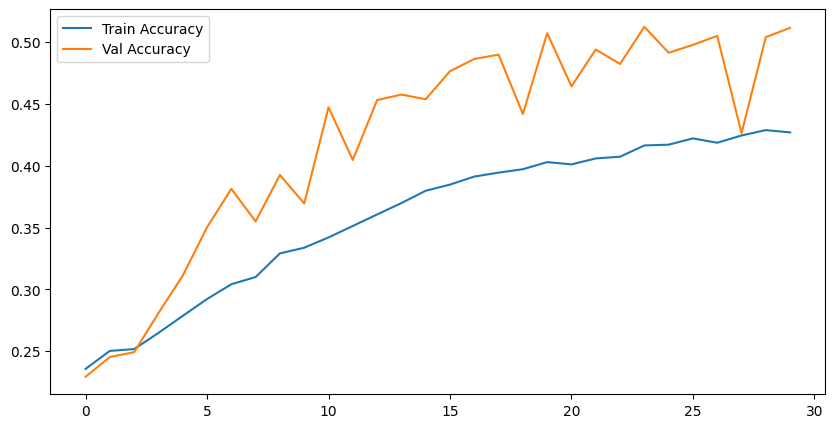

In [39]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()


In [46]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_emotion(img_path):
    img = image.load_img(img_path, target_size=(48,48), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    class_labels = list(train_generator.class_indices.keys())
    return class_labels[class_index]

print(predict_emotion(os.path.join(surprise_path, surprise_files[7])))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
surprise
